# Project 2 (Dynamic System Modeling and Control): 
## A case study on the quarter car model's suspension system

### Date: Dec 11 2024

### Authors: Dylan Clark & Alejandro Osorio

__Abstract:__ The problem presented involves modeling the dynamics of an active suspension system using a quarter car model, which helps simplify the full car 
suspension into a simpler representation. This quarter car suspension system includes the car body mass (Ms) and wheel mass (Mus) with spring and damping 
coefficients (Ks, Kt,  & Ca) to account for suspension stiffness and damping. A state space representation is required to describe the dynamics of the system, 
with state space variables such as car body displacement, wheel deflection, and their velocities. The model aims to improve ride quality by adjusting the 
control input from the actuator (Ua) based on road disturbances ( r ). Actuator input is controlled via state feedback system and MPC, with a comparison made between the two.

# Section 2

## Dynamics model of the system
 
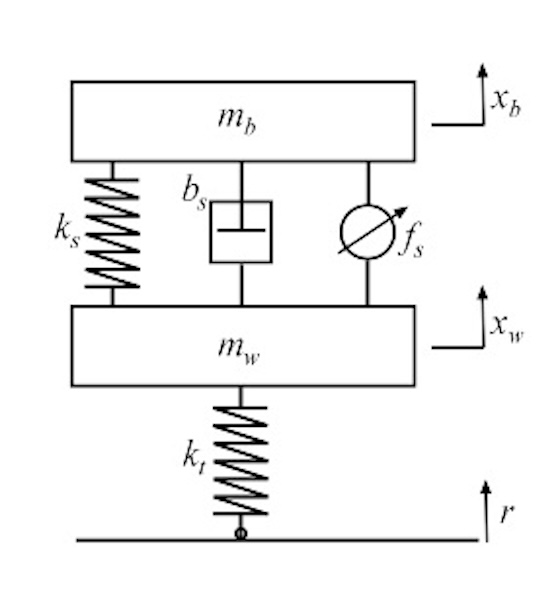

### Continuous time equation:
## $\scriptsize \dot x = \begin{bmatrix}
                            0 & 1 & 0 & -1 
                            \\-K_a/M_s & -C_a/M_s & 0 & C_a/M_s 
                            \\0 & 0 & 0 & 1 
                            \\K_a/M_{us} & C_a/M_{us} & -K_t/M_{us} & -C_a/M_{us}
                            \end{bmatrix}
                            x +\begin{bmatrix} 0 \\ 1/M_s \\ 0 \\ -1/M_s \end{bmatrix} u_a + 
                            \begin{bmatrix} 0 \\ 0 \\ -1 \\ 0 \end{bmatrix} \dot r$   
                                                    
## $\scriptsize x = \begin{bmatrix}
x_1 \\ 
x_2 \\ 
x_3 \\ 
x_4 
\end{bmatrix} $

$\large \begin{align}
x_1 &= x_s - x_w \\
x_2 &= \dot x_s \\
x_3 &= x_w - r \\
x_4 &= \dot x_w 
\end{align}$
<p> </p>


### Discrete time equation:
$\large \mathbf{x}_{k+1} = \mathbf{x}_k + \Delta t (\begin{bmatrix}
                    0 & 1 & 0 & -1 
                    \\-K_a/M_s & -C_a/M_s & 0 & C_a/M_s 
                    \\0 & 0 & 0 & 1 
                    \\K_a/M_{us} & C_a/M_{us} & -K_t/M_{us} & -C_a/M_{us}
\end{bmatrix}\mathbf{x}_k + \begin{bmatrix}
0 \\ 
1/M_s \\ 
0 \\ 
-1/M_s
\end{bmatrix}\mathbf{u}_k + 
\begin{bmatrix} 
0 \\ 
0 \\ 
-1 \\ 
0 \end{bmatrix} \dot r)
$

$\large \mathbf{y}_k = \begin{bmatrix}
1 & 0 & 0 & 0
\\ 0 & 1 & 0 & 0 
\\ 0 & 0 & 1 & 0
\\ 0 & 0 & 0 & 1
\end{bmatrix} \mathbf{x}_k$
<p> </p>


### Static parameters used in the model
$\large \begin{align}
M_s &= 290kg : \text{Mass of the car}\\
M_{us} &= 59kg : \text{Mass of the wheel}\\
K_a &= 16812 N/m : \text{Spring coefficient (of the suspension coil)} \\
k_t &= 190, 000 N/m : \text{Spring coefficient (of the tire deformation)} \\
C_a &= 1000 N/(m/s) : \text{Damper coefficient} \\
U &= N : \text{The force applied by the actuator} \\
\Delta t &= 0.001 : \text{Time step used in for the discrete-time simulations}
\end{align}$
<p> </p>
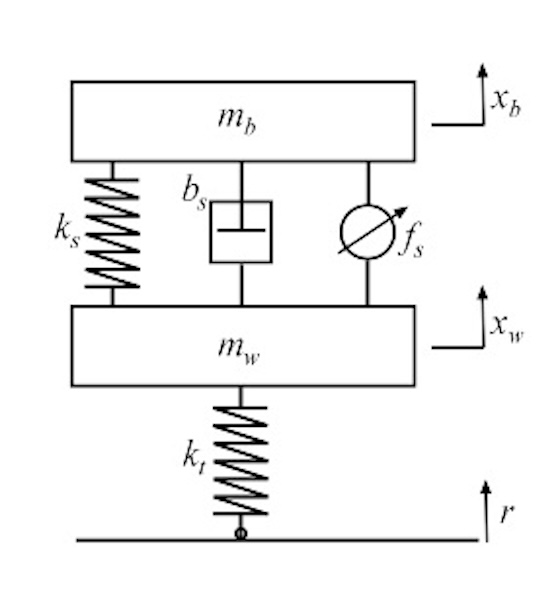

# Section 3

## Examples of applications in the real world

### Magnetic controlled suspension, usually for high-performance applications. This type of suspension can analyze states and change inputs millions of times a second. (image source: https://www.audi-technology-portal.de/en/chassis/suspension-control-systems/audi-magnetic-ride_en)
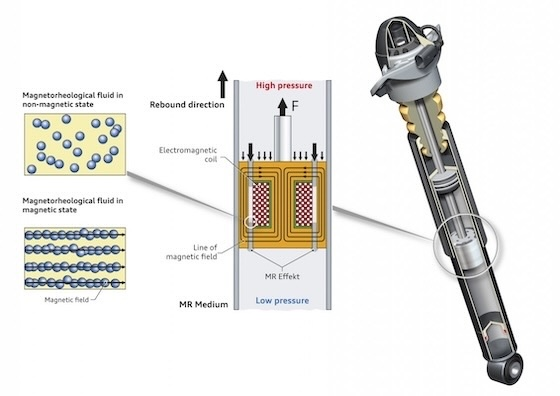
### This magnetic suspension is used in the R8, Corvette, and other such vehicle types. (image source: https://www.caranddriver.com/audi/r8)
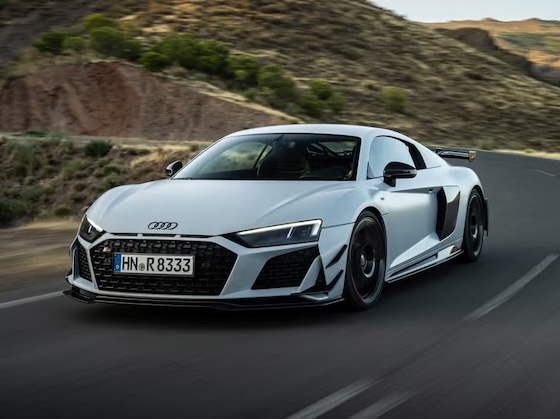
### Air suspension has the added can adapt to road conditions like magnetic, but at a slow rate (typically 100 times a second). But, has the additional benefit of being able to adjust ride height. This is beneficial for vehicles that encounter a mix of onroad/offroad conditions or need dynamic heigh for loading/unloading.(image source: https://www.researchgate.net/figure/Different-configurations-of-air-suspension-systems_fig2_305759137)
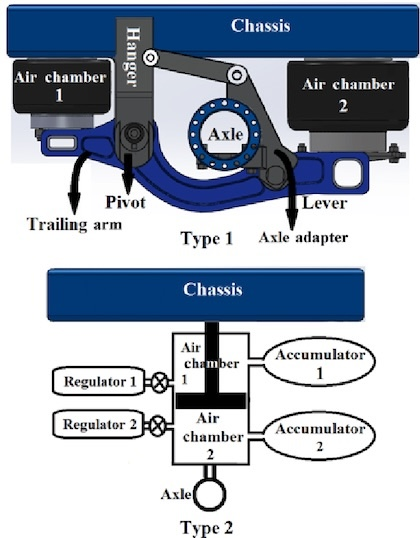
### This offroad/onroad vehicle benfits from air suspension for additional clearance. (image source: https://www.caranddriver.com/mercedes-benz/e-class-wagon)
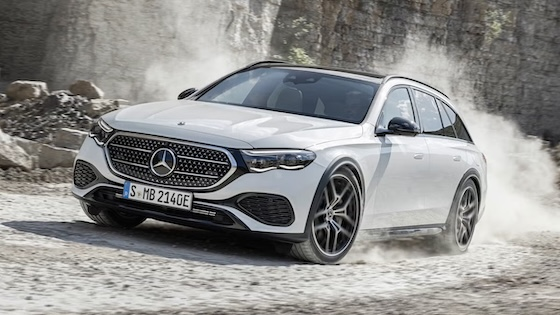
### Semi trucks benefit from being able to change cargo loading height and raising up under suspension compression from heavy loads. (image source: https://www.google.com/search?
client=opera&hs=pfv&sca_esv=965d53c27093c0d9&q=semi+truck&udm=2&fbs=AEQNm0Aa4sjWe7Rqy32pFwRj0UkWd8nbOJfsBGGB5IQQO6L3J03RPjGV0MznOJ6Likin94pT_oR1DTSof42bOBxoTNxGeB1pS5_mub79WlyOO98XhIk23VgQLBrLk5LmWmp4wysWdWLdn8ns9TonxEmlm3zvom26q0bXc5psAZwMyMrCHLQqn7IG-kx7Gt46qOA7G_WEFjMdJ-jODFYyqi_27SAeTeJV3g&sa=X&ved=2ahUKEwi_2JDmzoqJAxXCQjABHdG7NqcQtKgLegQIFhAB&biw=1510&bih=863&dpr=2#vhid=lH9ALQeckyBB7M&vssid=mosaic)
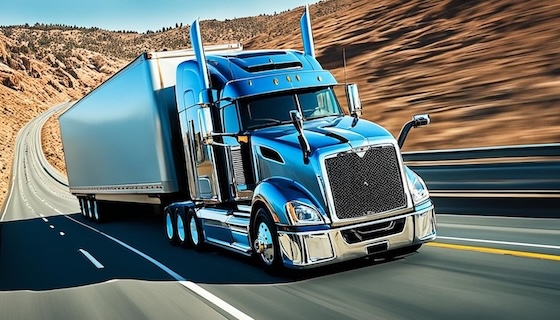
### Typical input devices are accelerometers and LVDT (linear position sensor) (image sources: https://dewesoft.com/blog/measure-position-displacement-with-lvdt-sensors, https://www.phidgets.com/docs/Accelerometer_Guide)
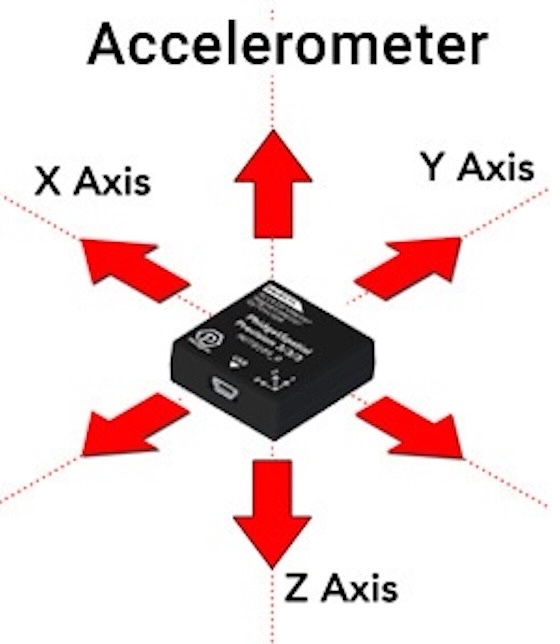
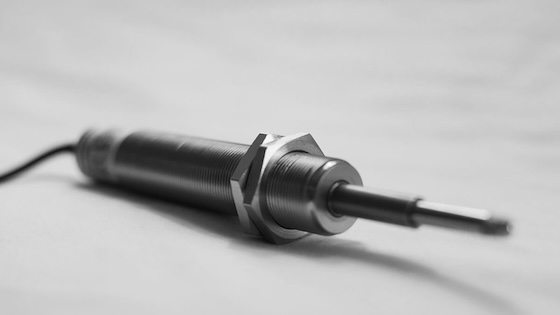

# Section 4
## Implementation of the dynamic model (the function/solver used for implementing the equations)!).

In [1]:
# run before other cells
!pip install control
!pip install do-mpc[full]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 6.8 MB/s eta 0:00:00


In [2]:
# Basic helper functions
import numpy as np
import math
import matplotlib.pyplot as plt
import control as ct
# Import do_mpc package:
import do_mpc
from casadi import *
from casadi.tools import *


# The step function
def unit_step(time, actuation_time, scalar):
    if time >= actuation_time:
        value = 1
    else:
        value = 0
    return scalar * value


# The impulse function
def unit_impulse(time, actuation_time, dt, scalar):
  return scalar*(unit_step(time, actuation_time, scalar) - unit_step(time, actuation_time+dt, scalar))


# The ramp function
def unit_ramp(time, actuation_time):
    if time >= actuation_time:
        value = time - actuation_time
    else:
        value = 0
    return value


# The sinusoidal function
def sin_wave(time, actuation_time, freq, amplitude):
    if time >= actuation_time:
        value = amplitude*math.sin(2*math.pi*freq*(time - actuation_time))
    else:
        value = 0
    return value


# Equation for typical road deformation
def road_deformation(t,bump_size,num_of_bumps):
    a = 0
    match bump_size:
        case "large":
            bump_size = 0.2
        case "medium":
            bump_size = 0.1
        case "small":
            bump_size = 0.05
    # if (t >= 0.5 and t <=0.75) or (t >= 3.0 and t <= 3.25):
    if num_of_bumps == 0:
        a = 0
        
    elif num_of_bumps == 1:
        if t >= 0.5 and t <=0.75:
            a = bump_size
            
    elif num_of_bumps == 2:
        if t >= 0.5 and t <=0.75:
            a = bump_size
        elif t >= 3.0 and t <= 3.25:
            a = bump_size
            
    elif num_of_bumps == 3:
        if t >= 0.5 and t <=0.75:
            a = bump_size
        elif t >= 1.0 and t <= 1.25:
            a = bump_size
        elif t >= 1.5 and t <= 1.75:
            a = bump_size
    
    else:
        r_dot = 0
    r_dot = a*(1-math.cos(8*math.pi*t))/2
    return r_dot


# state space equation
def state_space_model(A,B,C,D,E,r_dot, x_k, u_k, dt):  
    # calculate next state
    x_k1 = dt*(np.matmul(A,x_k) + np.matmul(B,u_k) + (E*r_dot)) + x_k
    # calculate current state
    y = np.matmul(C,x_k) + np.matmul(D,u_k)
    return x_k1, y


def plot_states_inputs_2x3(time_values, x_values, u_values, r_values):
    # create subplots
    fig, axs = plt.subplots(2, 3,figsize=(10,10))
    fig.tight_layout(pad=5.0)
    # plot the 1st state vs time
    axs[0,0].plot(time_values, x_values[:,0])
    axs[0,0].set_xlabel('Time (seconds)')
    axs[0,0].set_ylabel('Suspension Travel (m)')
    axs[0,0].grid()
    # plot the 2nd state vs time
    axs[0,1].plot(time_values, x_values[:,1])
    axs[0,1].set_xlabel('Time (seconds)')
    axs[0,1].set_ylabel('Car Body Velocity (m/sec)')
    axs[0,1].grid()
    # plot the 3rd state vs time
    axs[1,0].plot(time_values, x_values[:,2])
    axs[1,0].set_xlabel('Time (seconds)')
    axs[1,0].set_ylabel('Wheel Deflection (m)')
    axs[1,0].grid()
    # plot the 4th state vs time
    axs[1,1].plot(time_values, x_values[:,3])
    axs[1,1].set_xlabel('Time (seconds)')
    axs[1,1].set_ylabel('Wheel Velocity (m/sec)')
    axs[1,1].grid()
    # plot the actuator input vs time
    axs[0,2].plot(time_values, u_values)
    axs[0,2].set_xlabel('Time (seconds)')
    axs[0,2].set_ylabel('Actuator force (N)')
    axs[0,2].grid()
    # plot road disturbance vs time
    axs[1,2].plot(time_values, r_values)
    axs[1,2].set_xlabel('Time (seconds)')
    axs[1,2].set_ylabel('Road Disturbance (m)')
    axs[1,2].grid()

   
# Matrices for the suspension model
def create_matrices():
    car_mass = 290 #kg
    wheel_mass = 59 #kg
    k_a = 16812 #N/m Spring coefficient (coil)
    k_t = 190000 #N/m Spring coeffient (tire)
    c_a = 1000 #N/(m/s) Damper coefficient
    # define the A, B, C, and D matrices
    A = np.array([[0,1,0,-1], 
                  [(-k_a/car_mass) , (-c_a/car_mass) , 0 , (c_a/car_mass) ],
                  [0,0,0,1],
                  [(k_a/wheel_mass) , (c_a/wheel_mass) , (-k_t/wheel_mass) , (-c_a/wheel_mass) ]])
    B = np.array([[0,
                  1/car_mass,
                  0,
                  -1/car_mass]]).T
    C = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,1,0],
                [0,0,0,1]])
    D = np.array([[0.0]])
    E = np.array([[0,
                  0,
                  -1,
                  0]]).T
    return A, B, C, D, E


# Attempt at calculating G forces, ended up not using
def calculate_gforce(x_values, time_values):
    velocity_values = []  
    for values in x_values:
        velocity_values.append(values[1]) # Extracts the car body velocity values from the state matrix
    max_velocity = max(velocity_values)
    min_velocity = min(velocity_values)
    delta = min_velocity - max_velocity  # Calculate the velocity difference
    max_velocity_index = np.where(velocity_values == max_velocity)
    min_velocity_index = np.where(velocity_values == min_velocity)
    time_of_max = time_values[max_velocity_index]
    time_of_min = time_values[min_velocity_index]
    print("time of max vel" , time_of_max)
    print("time of min vel", time_of_min)
    print("max velocity", max_velocity)
    print("min_velocity", min_velocity)
    

def saturate(signal, saturation_level):
    # apply the upper-bound for saturation
    if signal > saturation_level:
        output = saturation_level
    # apply the lower-bound for saturation
    elif signal < -saturation_level:
        output = -saturation_level
    # do not change the signal in other cases
    else:
        output = signal
    return output


def plot_eigenvalues(open_real, open_imag, closed_real, closed_imag):
    plt.figure(figsize=(8, 8))
    plt.scatter(open_real, open_imag, color='red', marker='o', label="Open-loop Eigenvalues")
    plt.scatter(closed_real, closed_imag, color='blue', marker='x', label="Closed-loop Eigenvalues")
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel("Real Part")
    plt.ylabel("Imaginary Part")
    plt.title("Eigenvalues of Open-loop vs Closed-loop System")
    plt.legend()
    plt.grid(True)
    plt.show()

# Section 5
## Various tests using different inputs/parameters



A:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.00000000e+00]
 [-5.79724138e+01 -3.44827586e+00  0.00000000e+00  3.44827586e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 2.84949153e+02  1.69491525e+01 -3.22033898e+03 -1.69491525e+01]]
B:
 [[ 0.        ]
 [ 0.00344828]
 [ 0.        ]
 [-0.00344828]]
C:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
D:
 [[0.]]
E:
 [[ 0]
 [ 0]
 [-1]
 [ 0]]
dimentions of x_values
 (5001, 4)
dimentions of u_values
 (5001, 1)
dimentions of time_values
 (5001, 1)


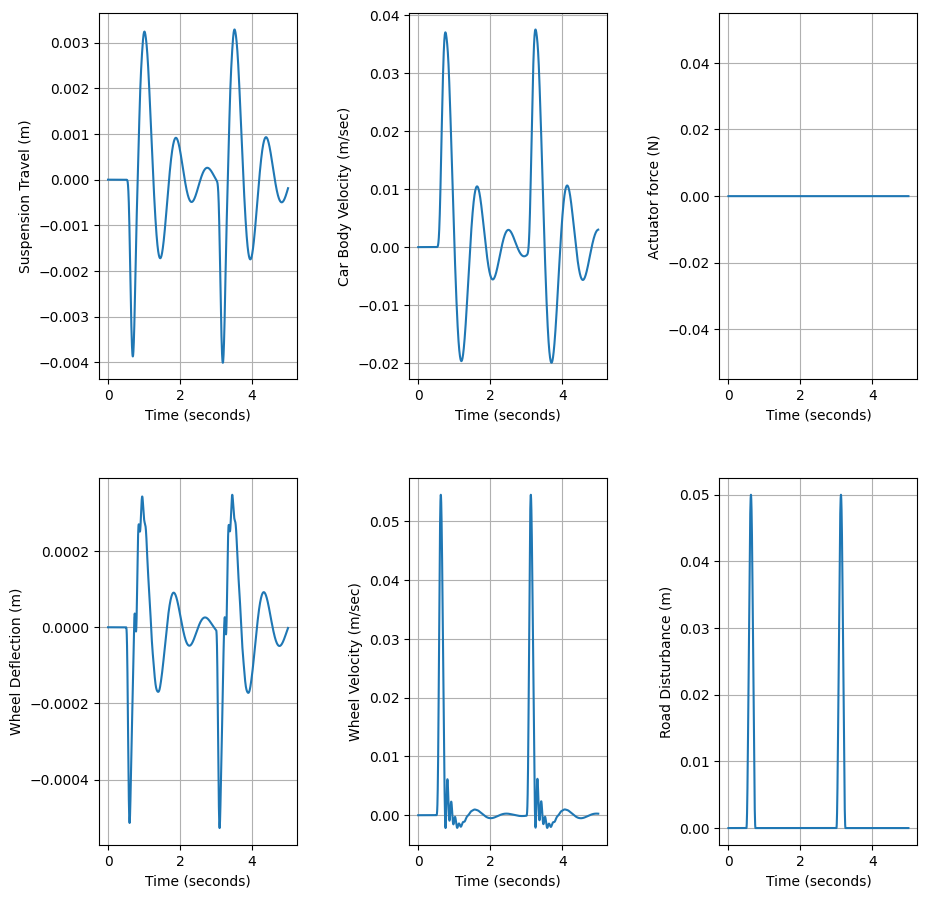

In [3]:
#intial conditions

import math
# simulation variables
t_0 = 0 # start time (seconds)
t_f = 5 # end time (seconds)
dt = .001 # delta_t (seconds)
u_0 = 0 # Initial actuator force
a = 0.0 # amplitude of road disturbance
r_dot = 0 # static road disturbance value for testing/to initialize the numpy array below
A, B, C, D, E = create_matrices()

# initialzies scenarios for different cases
num_of_bumps = 0
bump_size = ""

case = 3
match case:
        case 1:
            # Case 1: initial states at 0 with 2 medium sized bumps
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 2
            bump_size = "medium"
        
        case 2:
            # Case 2: initial states at 0 with 1 large bump
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 1
            bump_size = "large"
              
        case 3:
            # Case 3: initial states at 0 with 2 small bumps
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 2
            bump_size = "small"
            
        case 4:
            # Case 4: initial states at 0 with 3 small bumps close together
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 3
            bump_size = "small"
        case 5:
            # Case 5: initial car velocity of 0.3
            x_0 = np.array([[0,0.3,0,0]]).T
            num_of_bumps = 0
            bump_size = "small"


# variables for tracking the states
rdot_values = np.array(r_dot)
x_values = np.array(x_0.T)
time_values = np.array([[t_0]])
u_values = np.array([[u_0]])
x_k = x_0 # Initalizes the first step 
t = t_0 


# simulation
while t < t_f:
    r_dot = road_deformation(t,bump_size,num_of_bumps)
    u_k = np.array([[0]])
    x_k1, y_k = state_space_model(A,B,C,D,E,r_dot, x_k, u_k, dt) # Next state
    t += dt # update time step 
    # update the arrays
    rdot_values = np.append(rdot_values, r_dot)
    x_values = np.append(x_values, x_k1.T,axis = 0)
    u_values = np.append(u_values, u_k.T,axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    x_k = x_k1 # update state
print("A:\n", A)
print("B:\n", B)
print("C:\n", C)
print("D:\n", D)
print("E:\n", E)
print('dimentions of x_values\n',x_values.shape)
print('dimentions of u_values\n',u_values.shape)
print('dimentions of time_values\n',time_values.shape)
plot_states_inputs_2x3(time_values, x_values, u_values, rdot_values)

# Section 6
## Controller: Controllers used for our project

- Controller 1: State Feedback Method
- Controller 2: Model Predictive Control (MPC)


## STATE FEEDBACK METHOD

A:
 [[    0.       1.       0.      -1.  ]
 [  -57.97    -3.45     0.       3.45]
 [    0.       0.       0.       1.  ]
 [  284.95    16.95 -3220.34   -16.95]]
B:
 [[ 0.]
 [ 0.]
 [ 0.]
 [-0.]]
C:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
D:
 [[0.]]
E:
 [[ 0]
 [ 0]
 [-1]
 [ 0]]
Open - Real:  [-8.73 -8.73 -1.47 -1.47]
Open - Imag:  [ 58.15 -58.15   7.2   -7.2 ]
Rank of the controllability matrix:  4
Feedback gains:  [[ 132098.78   15911.22 -809524.33  -17323.53]]
Closed - Real:  [-50. -50. -20. -15.]
Closed - Imag:  [ 30. -30.   0.   0.]


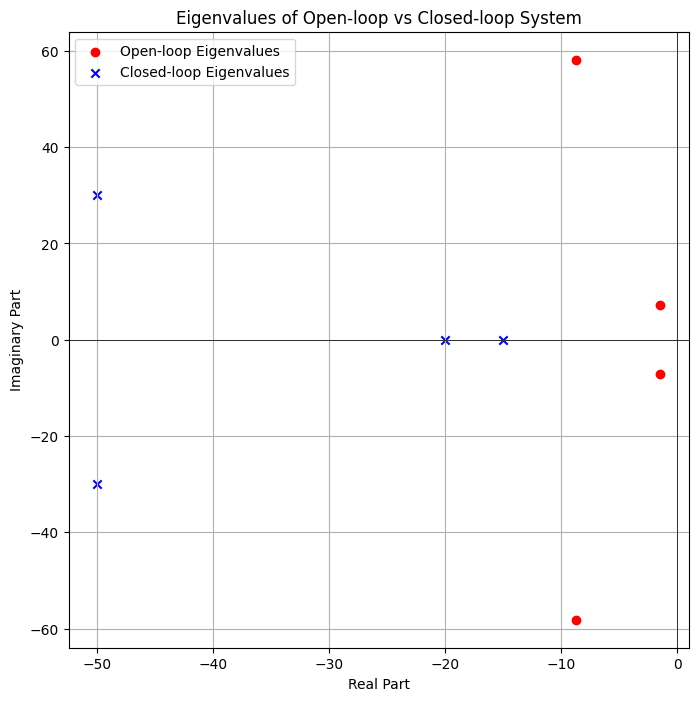

dimentions of x_values:
 (5001, 4)
dimentions of u_values:
 (5001, 1)
dimentions of time_values:
 (5001, 1)


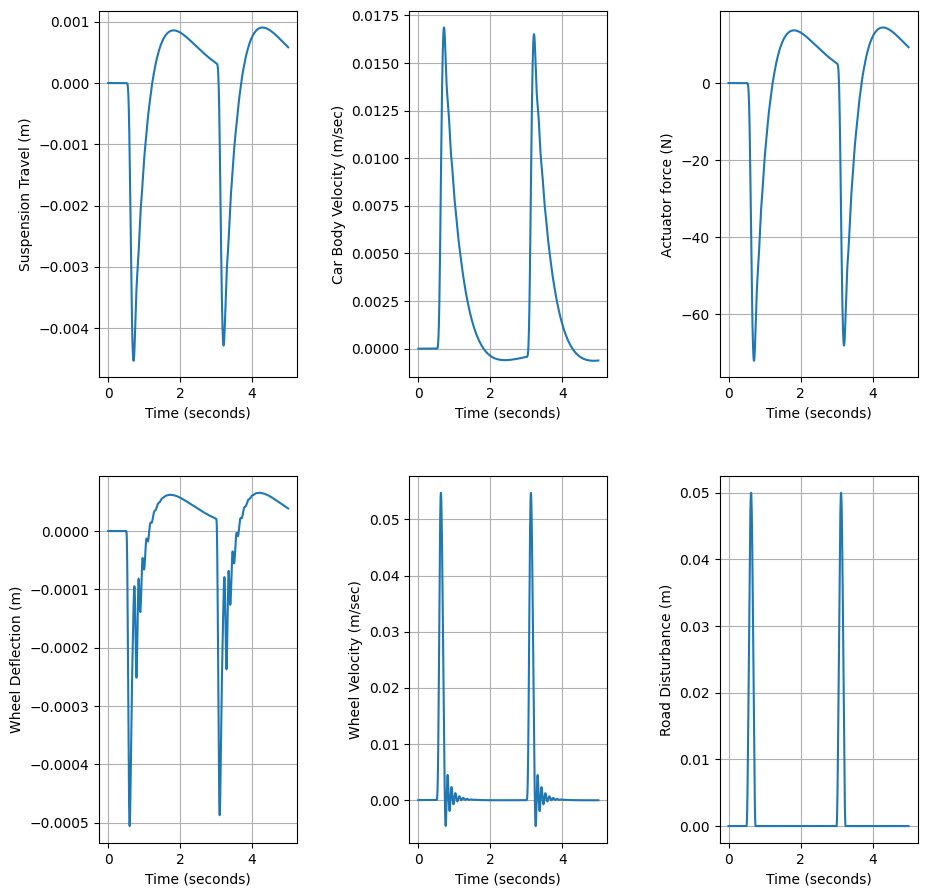

In [4]:
np.set_printoptions(precision = 2, suppress = True)

#intial conditions

import math
import control as ct

# simulation variables
t_0 = 0 # start time (seconds)
t_f = 5 # end time (seconds)
dt = .001 # delta_t (seconds)
u_0 = 0 # Initial actuator force
a = 0.0 # amplitude of road disturbance
r_dot = 0 # static road disturbance value for testing/to initialize the numpy array below
A, B, C, D, E = create_matrices() # creates matrices
print("A:\n", A)
print("B:\n", B)
print("C:\n", C)
print("D:\n", D)
print("E:\n", E)

# initialzies scenarios for different cases
num_of_bumps = 0
bump_size = ""

# find the eigen values of the system using A 
eigenvalues, eigenvectors = np.linalg.eig(A)

# extract real part
x_ol = eigenvalues.real 

# extract imaginary part
y_ol = eigenvalues.imag

print("Open - Real: ", x_ol)
print("Open - Imag: ", y_ol)

# controllability of the system
ctrb_matrix = ct.ctrb(A, B)
print('Rank of the controllability matrix: ',np.linalg.matrix_rank(ctrb_matrix))

# eigen values for the closed-loop system 
desired_eigvalues = [-50+30j, -50-30j, -20, -15]

# state-feedback gains K
K = ct.place(A, B, desired_eigvalues)
print('Feedback gains: ',K)

# eigen values of the closed-loop system and the open-loop system
A_cl = A-np.matmul(B,K)

# eigen values of the system using A 
eigenvalues, eigenvectors = np.linalg.eig(A_cl)

# extract real part using numpy array 
x_cl = eigenvalues.real 

# extract imaginary part using numpy array 
y_cl = eigenvalues.imag

# display results
print("Closed - Real: ", x_cl)
print("Closed - Imag: ", y_cl)
plot_eigenvalues(x_ol,y_ol,x_cl,y_cl)


case = 3
match case:
        case 1:
            # Case 1: initial states at 0 with 2 medium sized bumps
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 2
            bump_size = "medium"
        
        case 2:
            # Case 2: initial states at 0 with 1 large bump
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 1
            bump_size = "large"
              
        case 3:
            # Case 3: initial states at 0 with 2 small bumps
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 2
            bump_size = "small"
            
        case 4:
            # Case 4: initial states at 0 with 3 small bumps close together
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 3
            bump_size = "small"
            
        case 5:
            # Case 5: initial car velocity of 0.3
            x_0 = np.array([[0,0.3,0,0]]).T
            num_of_bumps = 0
            bump_size = "small"


# Initalizes the first step
x_k = x_0 
t = t_0 
force_max = 1500
x_d = 0

# variables for tracking the states
rdot_values = np.array(r_dot)
x_values = np.array(x_0.T)
time_values = np.array([[t_0]])
u_values = np.array([[u_0]])


# simulation
while t < t_f:
    r_dot = road_deformation(t,bump_size,num_of_bumps)
    control_input = -(K * (x_d - x_k))
    force = saturate(control_input[0][1], force_max)
    u_k = np.array([[force]])
    x_k1, y_k = state_space_model(A,B,C,D,E,r_dot, x_k, u_k, dt) # Next state
    t += dt # update time step 
    # update the arrays
    rdot_values = np.append(rdot_values, r_dot)
    x_values = np.append(x_values, x_k1.T,axis = 0)
    u_values = np.append(u_values, u_k.T,axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    x_k = x_k1 # update state


print('dimentions of x_values:\n',x_values.shape)
print('dimentions of u_values:\n',u_values.shape)
print('dimentions of time_values:\n',time_values.shape)
plot_states_inputs_2x3(time_values, x_values, u_values, rdot_values)


## MODEL PREDICTIVE CONTROLLER (MPC)

Model defined!
MPC solver defined
initial conditions: [[0 0 0 0]] and input: 0
x_0:
 [[0]
 [0]
 [0]
 [0]]
dimentions of x_values:
 (5001, 4)
dimentions of time_values:
 (5001, 1)


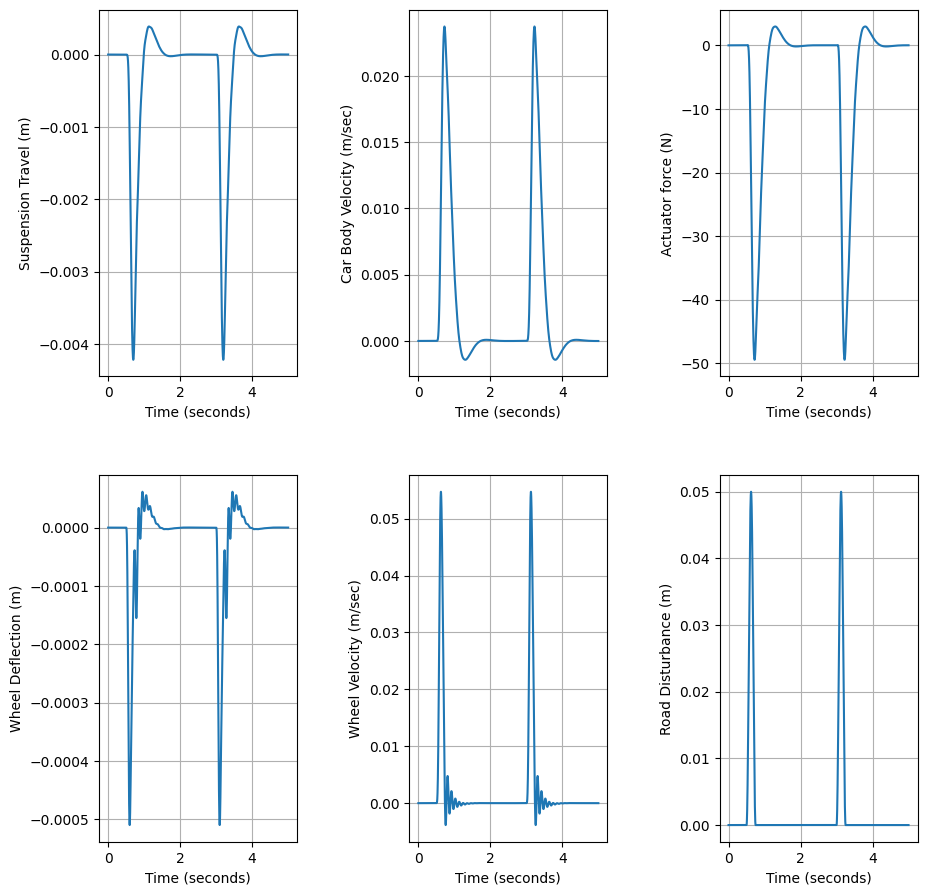

In [5]:
np.set_printoptions(precision = 2, suppress = True)

# set matrices
A, B, C, D, E = create_matrices()

############ MPC setup
# setting up the MPC solver
model_type = 'discrete' # either 'discrete' or 'continuous'
model = do_mpc.model.Model(model_type)
# define the states

s_travel = model.set_variable(var_type='_x', var_name='s_travel', shape=(1,1)) # suspension travel
car_velocity = model.set_variable(var_type='_x', var_name='car_velocity', shape=(1,1)) # car velocity
wheel_defl = model.set_variable(var_type='_x', var_name='wheel_defl', shape=(1,1)) # wheel deflection
wheel_velocity = model.set_variable(var_type='_x', var_name='wheel_velocity', shape=(1,1)) # wheel velocity
r_dot = 0

# define the inputs
act_force = model.set_variable(var_type='_u', var_name='act_force')

# setup the control goals
model.set_expression(
        expr_name="lagrange_term", expr= .000001*act_force**2
)

x_d = 0
# stabilize around [0,0,0,0]
model.set_expression(
    expr_name="meyer_term", expr= 300*s_travel**2 + 650* (0 - car_velocity)**2 + 50*wheel_defl**2 + 50*wheel_velocity**2
)

# include the dynamics in the model
model.set_rhs("s_travel", (A[0][0]* s_travel + A[0][1]*car_velocity + A[0][2]*wheel_defl + A[0][3]*wheel_velocity + B[0]*act_force + E[0]*r_dot)* dt + s_travel)
model.set_rhs("car_velocity", (A[1][0]* s_travel + A[1][1]*car_velocity + A[1][2]*wheel_defl + A[1][3]*wheel_velocity + B[1]*act_force + E[1]*r_dot)* dt + car_velocity)
model.set_rhs("wheel_defl", (A[2][0]* s_travel + A[2][1]*car_velocity + A[2][2]*wheel_defl + A[2][3]*wheel_velocity + B[2]*act_force + E[2]*r_dot)* dt + wheel_defl)
model.set_rhs("wheel_velocity", (A[3][0]* s_travel + A[3][1]*car_velocity + A[3][2]*wheel_defl + A[3][3]*wheel_velocity + B[3]*act_force + E[3]*r_dot)* dt + wheel_velocity)

# finish the setup
model.setup()
print('Model defined!')

# solver setup
mpc = do_mpc.controller.MPC(model)
mpc.settings.n_horizon = 10 # predict the next N steps
mpc.settings.t_step = dt 
lterm = model.aux["lagrange_term"]
mterm = model.aux["meyer_term"]
mpc.set_objective(lterm=lterm, mterm=mterm)
mpc.set_rterm(act_force=0)
mpc.scaling['_x', 's_travel'] = 1
mpc.scaling['_x', 'car_velocity'] = 1
mpc.scaling['_x', 'wheel_defl'] = 10
mpc.scaling['_x', 'wheel_velocity'] = 1
mpc.bounds["lower", "_u", "act_force"] = -force_max
mpc.bounds["upper", "_u", "act_force"] = force_max
surpress_ipopt = {'ipopt.print_level':0, 'ipopt.sb': 'yes', 'print_time':0}
mpc.set_param(nlpsol_opts = surpress_ipopt)
mpc.setup()
print('MPC solver defined')
#####################

# simulation variables
force_max = 1500 # Newtons
t_0 = 0 # start time (seconds)
t_f = 5 # end time (seconds)
dt = .001 # delta_t (seconds)
u_0 = 0 # Initial actuator force
a = 0.0 # amplitude of road disturbance
r_dot = 0 # static road disturbance value for testing/to initialize the numpy array below

# variables for tracking the states
rdot_values = np.array(r_dot)
x_values = np.array(x_0.T)
time_values = np.array([[t_0]])
u_values = np.array([[u_0]])

print('initial conditions:',x_values,'and input:', u_0)

# initialize the solver
x_k = x_0 # Initalizes the first step 
print('x_0:\n',x_0)
u_k = np.array([[u_0]]) # a dummy value for the open-loop tests
t = t_0

case = 3
match case:
        case 1:
            # Case 1: initial states at 0 with 2 medium sized bumps
            x_0 = np.array([[0,0,0,0]]).T # Initial value of the states
            num_of_bumps = 2
            bump_size = "medium"
        
        case 2:
            # Case 2: initial states at 0 with 1 large bump
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 1
            bump_size = "large"
            
        case 3:
            # Case 3: initial states at 0 with 2 small bumps
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 2
            bump_size = "small"
            
        case 4:
            # Case 4: initial states at 0 with 3 small bumps close together
            x_0 = np.array([[0,0,0,0]]).T
            num_of_bumps = 3
            bump_size = "small"
            
        case 5:
            # Case 5: initial car velocity of 0.3
            x_0 = np.array([[0,0.3,0,0]]).T
            num_of_bumps = 0
            bump_size = "small"


# simulate the system
while t < t_f:
    
    r_dot = road_deformation(t,bump_size,num_of_bumps)

    # reset and use the solver
    mpc.x0 = np.array(x_k)
    mpc.set_initial_guess()
    u_opt = mpc.make_step(x_k)    
    u_k = np.array([[u_opt[0][0]]])
    # update the states x_{k+1}
    x_k1, y_k = state_space_model(A,B,C,D,E,r_dot, x_k, u_k, dt)
    # update the simulation time stamp
    t += dt
    # update the arrays
    rdot_values = np.append(rdot_values, r_dot)
    x_values = np.append(x_values, x_k1.T,axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    u_values = np.append(u_values, u_k.T,axis = 0)
    # set up the loop for the next iteration
    x_k = x_k1

print('dimentions of x_values:\n',x_values.shape)
print('dimentions of time_values:\n',time_values.shape)

plot_states_inputs_2x3(time_values, x_values, u_values, rdot_values)


# Section 7
## Discussion and conclusions

&nbsp;&nbsp;&nbsp;&nbsp;The MPC controller generally yields better results than the state feedback controller in terms of quicker system response. However, values for the MPC variable weights have to be tuned carefully to avoid erratic behavior. The state feedback controller can also become erratic with too large of values but tends to be easier to fine tune. Although MPC achieves better results overall, it's computation time is much greater than state feedback. This can be remediated with lower values for prediction steps, however, runtime is still significantly longer than state feedback. 

&nbsp;&nbsp;&nbsp;&nbsp;Our model does a pretty good job of returning the car body velocity to 0 ("leveling" out the car) very quickly, however this comes at a cost of passenger comfort. If tuning for passenger comfort, a smoother curve would be ideal. This is especially more pertinent with the MPC controller which can return body velocity to 0 very quickly, which results in higher G-forces felt. Test case 4 (which has 3 bumps in quick succession) highlights this further.

&nbsp;&nbsp;&nbsp;&nbsp;Drawback of this system is that it only models bumps and does not test with dips which may have an effect on system response. Additionally, this model is only 2-D and does not take into account the car's velocity. As a consequence, it is difficult to get a realistic picture of G-force, or the felt force due to the car body's velocity. For instance, if the model measured car velocity, this would have an effect on how much impact force the wheel/suspension will experience, which would then yield a better picture of real world G-forces.

# Sources

- dewesoft.com/blog/measure-position-displacement-with-lvdt-sensors. Accessed 12 Oct. 2024. Support, P. (2024, January 16). Accelerometer Guide Phidgets support. Phidgets Support. 
- https://www.phidgets.com/docs/Accelerometer_Guide
- Mohamed Elgohary. (n.d.). Table 1. https://www.researchgate.net/figure/Quarter-car-parameters_tbl1_320487516
- Audi Technology Portal Audi magnetic ride. (n.d.). Audi Technology Portal. https://www.audi-technology-portal.de/en/chassis/suspension-control-systems/audi-magnetic-ride_en
- Audi Analysis and optimization of air suspension system with independent height and stiffness tuning. (n.d.). Research Gate. https://www.researchgate.net/figure/Different-configurations-of-air-suspension-systems_fig2_305759137
- R8. (n.d.). https://www.caranddriver.com/audi/r8
- Schematic Diagram of the Instrumentation of the Active Suspension ..., www.researchgate.net/figure/Schematic-diagram-of-the-instrumentation-of-the-active-suspension-system_fig2_221915932. Accessed 15 Oct. 2024. 
- 024 Mercedes-Benz E-Class Wagon. (n.d.). Car And Driver. https://www.caranddriver.com/mercedes-benz/e-class-wagon
- semi truck - Google Search. (n.d.). https://www.google.com/search?client=opera&hs=pfv&sca_esv=965d53c27093c0d9&q=semi+truck&udm=2&fbs=AEQNm0Aa4sjWe7Rqy32pFwRj0UkWd8nbOJfsBGGB5IQQO6L3J03RPjGV0MznOJ6Likin94pT_oR1DTSof42bOBxoTNxGeB1pS5_mub79WlyOO98XhIk23VgQLBrLk5LmWmp4wysWdWLdn8ns9TonxEmlm3zvom26q0bXc5psAZwMyMrCHLQqn7IG-kx7Gt46qOA7G_WEFjMdJ-jODFYyqi_27SAeTeJV3g&sa=X&ved=2ahUKEwi_2JDmzoqJAxXCQjABHdG7NqcQtKgLegQIFhAB&biw=1510&bih=863&dpr=2#vhid=lH9ALQeckyBB7M&vssid=mosaic
- Sam, Y. M., Osman, J. H., & Ghani, M. A. (2003). A class of proportional-integral sliding mode control with application to active suspension system. Systems & Control Letters, 51(3–4), 217–223. https://doi.org/10.1016/j.sysconle.2003.08.007
- Sam, Yahaya Md., et al. “A Class of Proportional-integral Sliding Mode Control With Application to Active Suspension System.” Systems & Control Letters, vol. 51, no. 3–4, Dec. 2003, pp. 217–23. https://doi.org/10.1016/j.sysconle.2003.08.007.
- Saeidi, Dr. H. (n.d.). CSC-340-Report-template-and-example.IPYNB: CSC-340-001. https://uncw.instructure.com/courses/81876/files/11063660?wrap=1
